In [1]:
import sys
sys.path.insert(0, '../')
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from util import optimiser

import pandas as pd
import seaborn as sns

from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
cost_coefs = pd.read_csv("cost_function_coeffs.csv")
cost_coefs.head()
def f_mean(*args,**kwargs):
    return np.mean(f(*args,**kwargs),axis=0)

def f(x,y,alpha,beta,gamma):
    return x**2+alpha*x**2*y+beta*x*y**2+gamma*x*y
chosen_functions = [0,1,2,4,5,7,9,15,16,18]

In [3]:
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture
from sklearn.datasets import make_blobs
#samples = make_blobs(n_samples=[int(5000*p),int(5000*(1-p))],n_features=1,centers=[[mu1],[mu2]],cluster_std=[[sigma1],[sigma2]])
dist = GaussianMixture(n_components=2,covariance_type="spherical")
dist.fit(np.random.rand(10, 1))  # Now it thinks it is trained
mu1=-0.5
sigma1=0.15
mu2=0.4
sigma2=0.3
p=0.6

dist.weights_=np.array([p,1-p])
dist.means_=np.array([[mu1],[mu2]])
dist.covariances_=np.array([sigma1**2,sigma2**2])
dist.precisions_cholesky_ =  np.linalg.cholesky(np.linalg.inv([[sigma1**2,0],[0,sigma2**2]]))

In [7]:
df = pd.DataFrame(columns=['w_star','method','function','N'])
N = [10,25,50]

In [8]:
n_iter = 1
parameter_bounds =((1,None),(1,None),(None,None),(None,None))

for z in range(len(chosen_functions)):
    coefs = cost_coefs.iloc[chosen_functions[z]].values
    print(coefs)
    new_f = lambda x,y: f_mean(x,y,coefs[0],coefs[1],coefs[2])
    saa = optimiser.SAA(new_f)
    bagging = optimiser.BaggingSolver(400,
                                      objective_function=new_f)
    mle = optimiser.GMMSolver(False,2,
                              objective_function=new_f,
                             n_to_sample=10000)
    bayes = optimiser.GMMSolver(True,2,
                              objective_function=new_f,
                             n_to_sample=10000)
    kde = optimiser.KDESolver(10000,
                              objective_function=new_f)
    methods = [bagging,mle,saa,kde,bayes]
    for k in range(n_iter):
        for j in range(len(N)):
            samples = dist.sample(N[j])[0].reshape(-1)
            for ele in methods:
                w_star = ele.solve(samples,initial_conditions=0.0)[0]
                results = {'w_star': w_star,'method':ele.__str__(),
                       'function':chosen_functions[z]+1,'N':N[j]}
                df = df.append(results,ignore_index=True)
        # save the results so far        
        #df.to_csv(file_name)

[-0.67  2.56  2.51]
[ 0.02 -2.57  1.31]
[-0.51 -2.1   1.97]
[ 0.71 -1.45  1.62]
[0.19 2.17 1.04]
[-0.26  1.23  3.89]
[-0.22  3.71  0.19]
[0.65 2.02 3.68]
[0.6  0.86 0.33]
[ 0.49 -3.25  0.65]


In [7]:
df

,w_star,method,function,N
0,-0.249833,Bagging,1,10
1,-0.246145,MLE,1,10
2,-0.239805,SAA,1,10
3,-0.348933,KDE,1,10
4,-0.571082,Bagging,1,10
5,-0.561499,MLE,1,10
6,-0.562165,SAA,1,10
7,-0.731835,KDE,1,10
8,-0.557090,Bayesian,1,10
9,0.022861,Bagging,1,25


(array([  39.,  672., 1775.,  852.,  342.,  513.,  485.,  254.,   58.,
          10.]),
 array([-1.11032563, -0.85653712, -0.6027486 , -0.34896008, -0.09517156,
         0.15861695,  0.41240547,  0.66619399,  0.91998251,  1.17377102,
         1.42755954]),
 <a list of 10 Patch objects>)

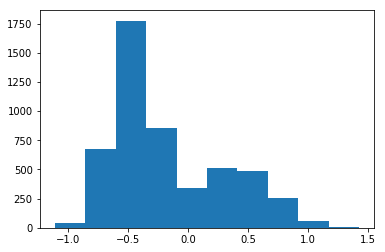

In [11]:
plt.hist(bayes.distribution.sample(5000)[0])

In [14]:
print(bayes.distribution.weights_)
print(bayes.distribution.means_)
print(bayes.distribution.covariances_)

[0.65750486 0.34249514]
[[-0.47246438]
 [ 0.38518095]]
[0.02956613 0.09375594]


In [15]:
print(mle.distribution.weights_)
print(mle.distribution.means_)
print(mle.distribution.covariances_)

[0.65321256 0.34678744]
[[-0.48330032]
 [ 0.42542208]]
[0.01958459 0.05968411]


(array([ 103.,  928., 1717.,  853.,  434.,  468.,  330.,  130.,   31.,
           6.]),
 array([-1.07946786, -0.83540635, -0.59134483, -0.34728332, -0.1032218 ,
         0.14083971,  0.38490123,  0.62896274,  0.87302426,  1.11708577,
         1.36114729]),
 <a list of 10 Patch objects>)

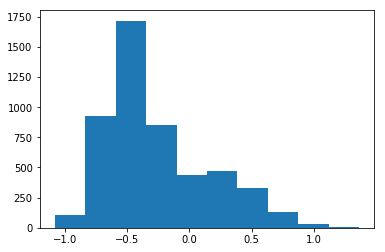

In [16]:
plt.hist(bayes.distribution.sample(5000)[0])

(array([  30.,  321., 1089., 1422.,  748.,  605.,  501.,  194.,   65.,
          25.]),
 array([-1.38116474, -1.1028868 , -0.82460887, -0.54633093, -0.26805299,
         0.01022495,  0.28850288,  0.56678082,  0.84505876,  1.1233367 ,
         1.40161464]),
 <a list of 10 Patch objects>)

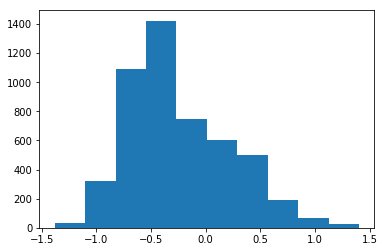

In [17]:
plt.hist(kde.kde.resample(5000)[0])

In [14]:
kde.kde.resample(5000).shape

(1, 5000)